# Nikita Kiran More(Batch 25 Jan)

# K-NEAREST NEIGHBOURS

# Objective: 
The objective of this assignment is to implement and evaluate the
K-Nearest Neighbours algorithm for classification using the given datasets

# 1. Analyse the data using the visualizations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Zoo.csv")

In [4]:
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Axes: xlabel='legs', ylabel='count'>

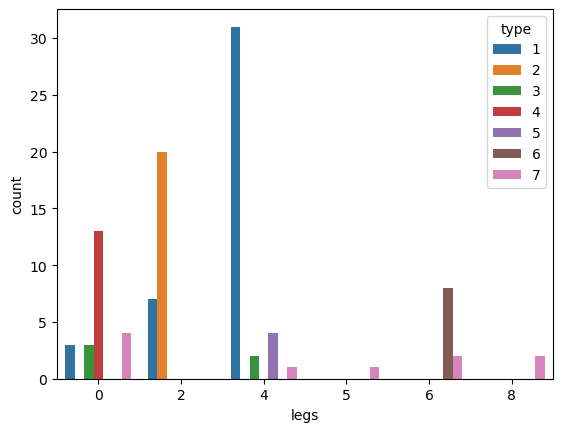

In [6]:
sns.countplot(x='legs',hue='type',data=data)

In [7]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

# 2. Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [16]:
scaler = StandardScaler()

In [17]:
x=data.drop(['animal name','type'],axis=1)

In [19]:
x_scaled=scaler.fit_transform(x)

In [20]:
y=data['type']

# 3. Split Dataset into Training and Testing

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# 4. Implement K-Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
Knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [27]:
Knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

# 5. Evaluation Metrics

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [29]:
y_pred = Knn.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\91940\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


# 6. Visualizing Decision Boundaries


In [44]:
X_train_2D = x_scaled[:, :2]

In [46]:
knn_2D = KNeighborsClassifier(n_neighbors=5)  
knn_2D.fit(X_train_2D, y)

KNeighborsClassifier()

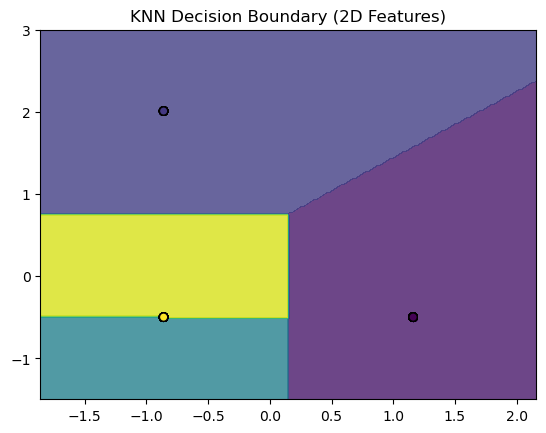

In [47]:
plot_decision_boundary(X_train_2D, y, knn_2D, 'KNN Decision Boundary (2D Features)')

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

In [42]:
knn_pca = KNeighborsClassifier(n_neighbors=5)  
knn_pca.fit(X_pca, y)

KNeighborsClassifier()

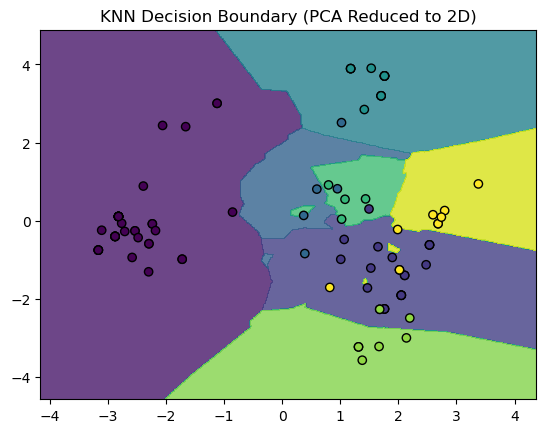

In [43]:
plot_decision_boundary(X_pca, y, knn_pca, 'KNN Decision Boundary (PCA Reduced to 2D)')